## 異なる強さの正則化(多項式回帰)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

### サンプルデータ１(多項式回帰)

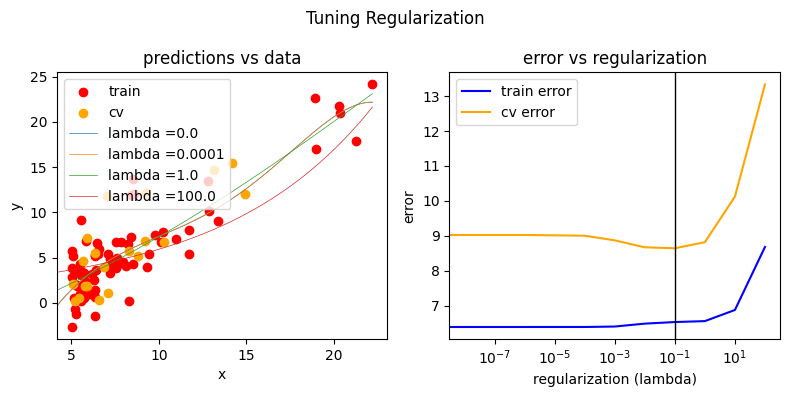

In [ ]:
#データの読み込み
data = pd.read_csv("../datasets/example1.txt")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size=0.20, random_state=1)

lambda_range = np.array([0.0, 1e-8, 1e-6, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
train_loss = np.zeros(num_steps)    #トレーニング誤差
cv_loss = np.zeros(num_steps)       #検証誤差
x = np.linspace(0,X.max(),100) #x軸１００等分
y_pred = np.zeros((100,num_steps))  #shape = (100,num_steps)
                                    #Input(shape=(100,)
#多項式回帰
for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = make_pipeline(
        PolynomialFeatures(degree = 5), #x_poly = poly.fit_transform(x)
        StandardScaler(),           #x_poly_scaled = scaler.fit_transform(x_poly)
        Ridge(alpha=lambda_, solver='auto')  #L2 J = mse + α × Σ(wᵢ²)(L1 は　lasso)
    )
    lmodel.fit(X_train, y_train)  # 学習

    # 予測と誤差計算
    yhat_train = lmodel.predict(X_train)
    train_loss[i] = np.mean((yhat_train - y_train) ** 2)

    yhat_cv = lmodel.predict(X_cv)
    cv_loss[i] = np.mean((yhat_cv - y_cv) ** 2)

    y_pred[:, i] = lmodel.predict(x.reshape(-1, 1))  # xは1次元なのでreshape
"""
x_poly =                                 scaled = 特徴量(列)ごとに平均0・分散1に
[[  1.   1.   1.    1.  ]               [[ 0.  -1.4142  -1.1625  -0.9167 ] 
 [  1.   2.   4.    8.  ]                [ 0.  -0.7071  -0.8139  -0.7706 ]
 [  1.   3.   9.   27.  ]      ⇒
 [  1.   4.  16.   64.  ]
 [  1.   5.  25.  125.  ]]               [ 0.   1.4142   1.6277   1.6664 ]]

"""

fig, ax = plt.subplots(1,2,figsize=(8,4)) #アックス
fig.suptitle("Tuning Regularization",fontsize = 12)

#比較表示(予測)
ax[0].set_title("predictions vs data",fontsize = 12)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].scatter(X_train, y_train, color = "red", label="train")
ax[0].scatter(X_cv, y_cv, color = "orange", label="cv")

ax[0].set_xlim(ax[0].get_xlim()) #後から追加する線のせいで軸が勝手に変わるのを防ぐ
ax[0].set_ylim(*ax[0].get_ylim()) #set(min,max)

for i in (0,3,7,9):
    ax[0].plot(x, y_pred[:,i],  lw=0.5, label=f"lambda ={lambda_range[i]}")
ax[0].legend()


#比較表示(損失)
ax[1].set_title("error vs regularization",fontsize = 12)
ax[1].plot(lambda_range, train_loss, label="train error", color = "blue")
ax[1].plot(lambda_range, cv_loss, label="cv error", color = "orange")
ax[1].set_xscale('log') #x軸対数に
idx = np.argmin(cv_loss) #err_cvのmin
x_min = lambda_range[idx]
#垂直線(x,長さ,...)
ax[1].vlines(x_min, *ax[1].get_ylim(), color = "black", lw=1) #unpack* (x, 0.01, 1.5, color = )

ax[1].set_xlabel("regularization (lambda)")
ax[1].set_ylabel("error")
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()

### サンプルデータ2(ニューラルネットワーク)

In [ ]:
# データの読み込み
df = pd.read_csv("../datasets/titanic.csv")
print(df.isnull().sum())

# 欠損値の処理
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# カテゴリ変数のエンコーディング
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df.iloc[:, -3:].info())

# 特徴量と目的変数の設定
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']
# データの分割
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)

# 特徴量の標準化(本来の検証の意味)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Cabin       204 non-null    object
 1   Embarked_Q  891 non-null    bool  
 2   Embarked_S  891 non-null    bool  
dtypes: bool(2), object(1)
memory usage: 8.8+ KB
None
(623, 8)


Finished lambda = 1e-10
Finished lambda = 1e-08
Finished lambda = 1e-06
Finished lambda = 0.001
Finished lambda = 0.1
         Lambda      Loss        Type
0  1.000000e-10  0.286605       Train
1  1.000000e-08  0.294459       Train
2  1.000000e-06  0.292890       Train
3  1.000000e-03  0.344911       Train
4  1.000000e-01  0.490207       Train
5  1.000000e-10  0.544163  Validation
6  1.000000e-08  0.543637  Validation
7  1.000000e-06  0.545405  Validation
8  1.000000e-03  0.553398  Validation
9  1.000000e-01  0.555220  Validation
         Lambda  Validation Accuracy
0  1.000000e-10             0.787313
1  1.000000e-08             0.776119
2  1.000000e-06             0.776119
3  1.000000e-03             0.779851
4  1.000000e-01             0.772388


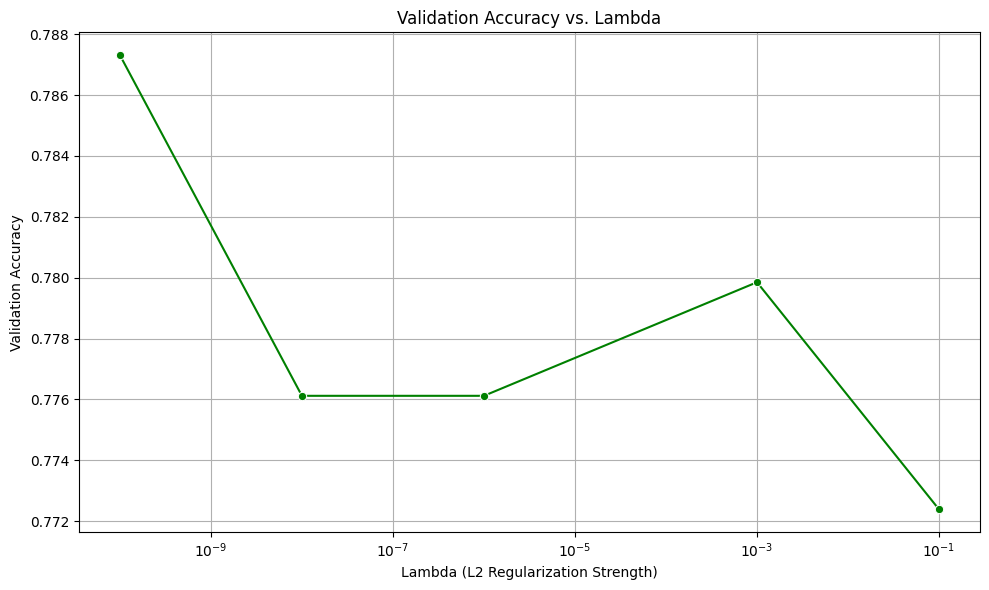

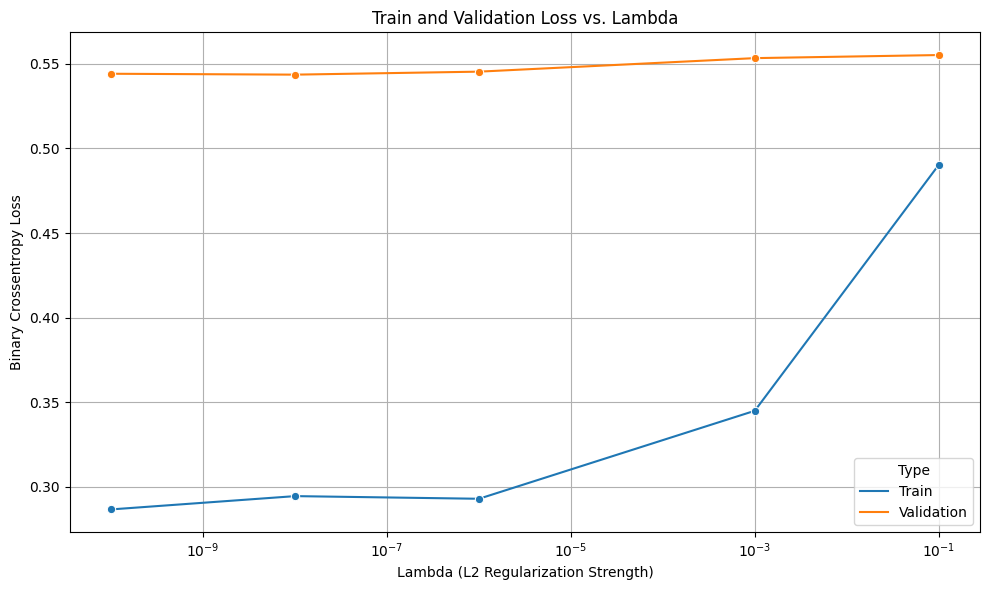

In [ ]:
lambdas = [1e-10 ,1e-8, 1e-6, 1e-3, 1e-1]
models = []
train_losses = []
val_losses = []
val_accuracies = []


for lambda_ in lambdas:
    tf.random.set_seed(1234)
    model = Sequential([
        Dense(80, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_), input_shape=(8,)),#1サンプルの形：8次元ベクトル
        Dense(30, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, validation_data=(X_cv, y_cv) , verbose=0)

    """
    history.history = {
    'loss': [...],           # 訓練データの損失
    'accuracy': [...],       # 訓練データの精度
    'val_loss': [...],       # 検証データの損失
    'val_accuracy': [...]    # 検証データの精度
    } 
    """
    
    models.append(model)
    train_losses.append(history.history['loss'][-1])
    val_losses.append(history.history['val_loss'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])
   

# 損失をデータフレームにまとめる
df_loss = pd.DataFrame({
    'Lambda': lambdas * 2,  # [0.001, 0.01, 0.1, 1, 0.001, 0.01, 0.1, 1]
    'Loss': train_losses + val_losses, #[0.3, 0.25, 0.2, 0.18, 0.35, 0.3, 0.28, 0.27]
    'Type': ['Train'] * len(lambdas) + ['Validation'] * len(lambdas) #['Train', 'Train', 'Train', 'Train', 'Validation', 'Validation', 'Validation', 'Validation']
})

# 正答率をデータフレームにまとめる
df_acc = pd.DataFrame({
    'Lambda': lambdas,
    'Validation Accuracy': val_accuracies
})

# 表として表示
print(df_loss)
print(df_acc)

# 正答率のグラフを描画
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_acc, x='Lambda', y='Validation Accuracy', marker='o', color='green')
plt.xscale('log')
plt.title('Validation Accuracy vs. Lambda')
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# グラフ描画
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_loss, x='Lambda', y='Loss', hue='Type', marker='o')#hueで色分けする列指定
plt.xscale('log')
plt.title('Train and Validation Loss vs. Lambda')
plt.xlabel('Lambda (L2 Regularization Strength)')
plt.ylabel('Binary Crossentropy Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

